In [87]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


In [88]:
bankdf=pd.read_csv('Bank_Personal_Loan.csv')
bankdf.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
#Question 2


bankdf.dtypes

#checking the datatype of each variable

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [45]:

bankdf.isnull().sum()

#no null values is the database

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [46]:
bankdf.describe().T

#There are 5000 records in our dataset
#Minumum value of Experience column is -3.0 which could be a mistake because Experience can not be negative.
#Rest of the variables look clean

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [47]:
# Checking the negative values in experience as min was -3
bankdf[bankdf['Experience'] < 0]['Experience'].value_counts()

#thus there are total of 52 records with -ve experience so we need to fix them

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [90]:
#First getting the median for all the positive values from experience

median = bankdf.loc[bankdf['Experience']>0, 'Experience'].median()
    
#Now replacing all negative values with NaN
bankdf.loc[bankdf.Experience<0, 'Experience'] = np.nan
    
#Replacing NaN with median
bankdf.fillna(median,inplace=True)
    

In [91]:
# Total records of negative experience is now zero after fixing

bankdf[bankdf['Experience'] < 0]['Experience'].count()

0

In [75]:
bankdf.Experience.describe()


count    5000.00000
mean       20.33800
std        11.25319
min         0.00000
25%        11.00000
50%        21.00000
75%        30.00000
max        43.00000
Name: Experience, dtype: float64

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

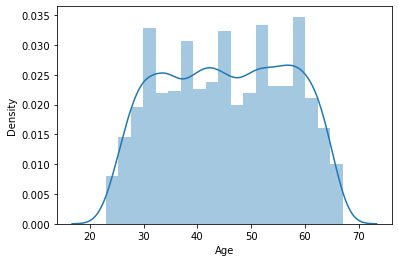

In [51]:
sns.distplot(bankdf['Age'])
#Age coloumn looks normally distributed

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

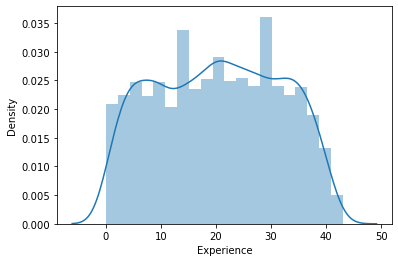

In [25]:
sns.distplot(bankdf['Experience'])

#Experience also looks normally distributed

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

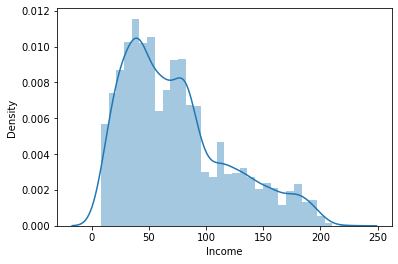

In [26]:
sns.distplot(bankdf['Income'])
#Customers with income between 0 to 100 is higher as the graph is right skewed

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

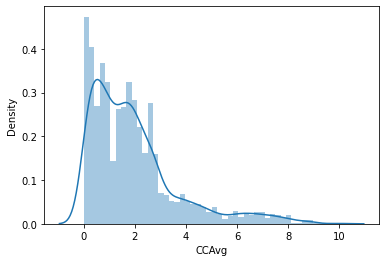

In [27]:
sns.distplot(bankdf['CCAvg'])

#Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K dollars.
#There are very few customers whose monthly avg. spending on credit card is more than 8k dollars.

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

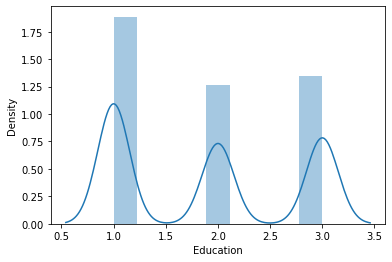

In [28]:
sns.distplot(bankdf['Education'])

#Undergrad customers are more than the Graduate and Advanced/Professional customers.

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

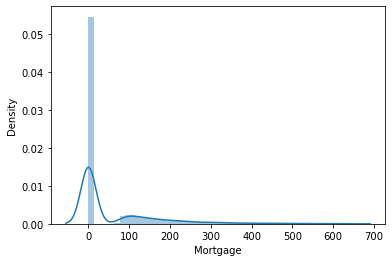

In [30]:
sns.distplot(bankdf['Mortgage'])
#Most customers have zero Mortgage

C:\Users\asus\Anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

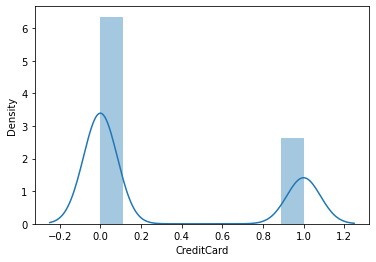

In [31]:
sns.distplot(bankdf['CreditCard'])

#Most customers dont have a credit card from Universal Bank

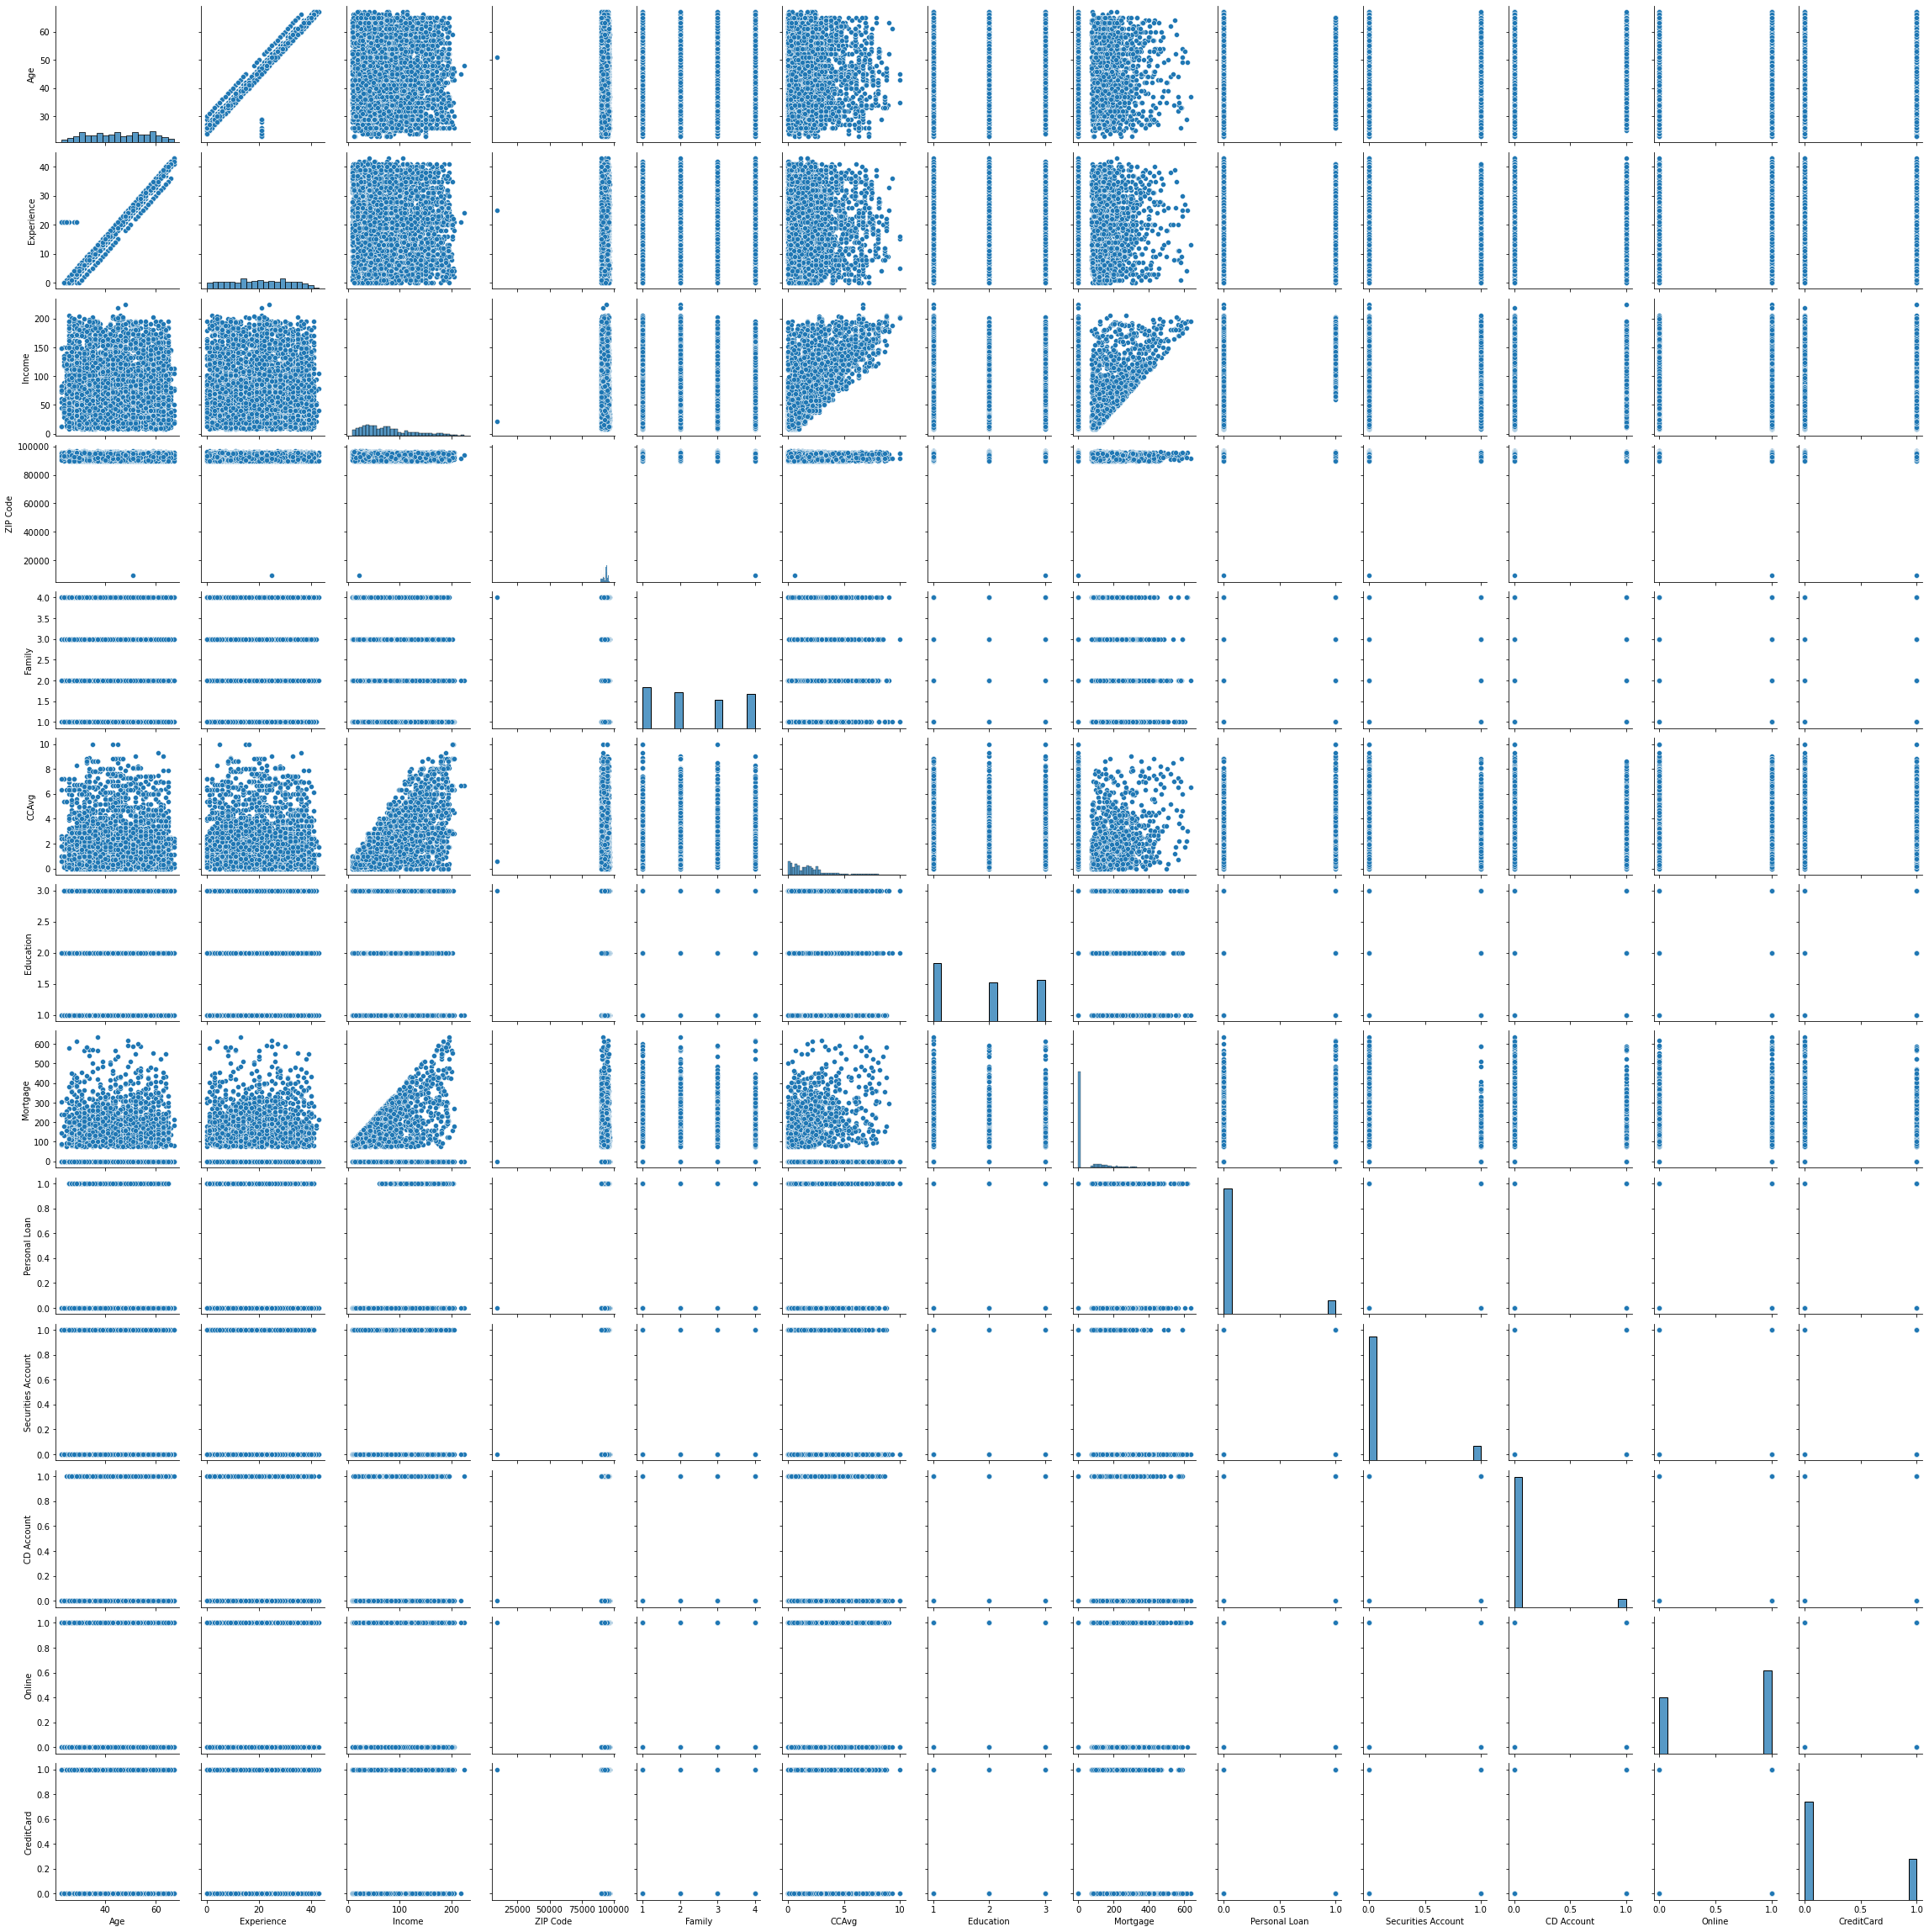

In [36]:
#Question 3


sns.pairplot(bankdf.iloc[:,1:]) 

#Age and Experience have a strong positive association
#We dont se any association of variables with zip codes(i.e. the different areas)
#Most of the customers did not accept the personal loan offered in the last campaign
#Most of the customers do not have a Securities account or a CD account
#Most customers have zero Mortgage
#Family and Education has low association with Personal Loan
#Customers with income range between 0-100 is relatively higher than those between 100-200
#Popular amoung lower income groups

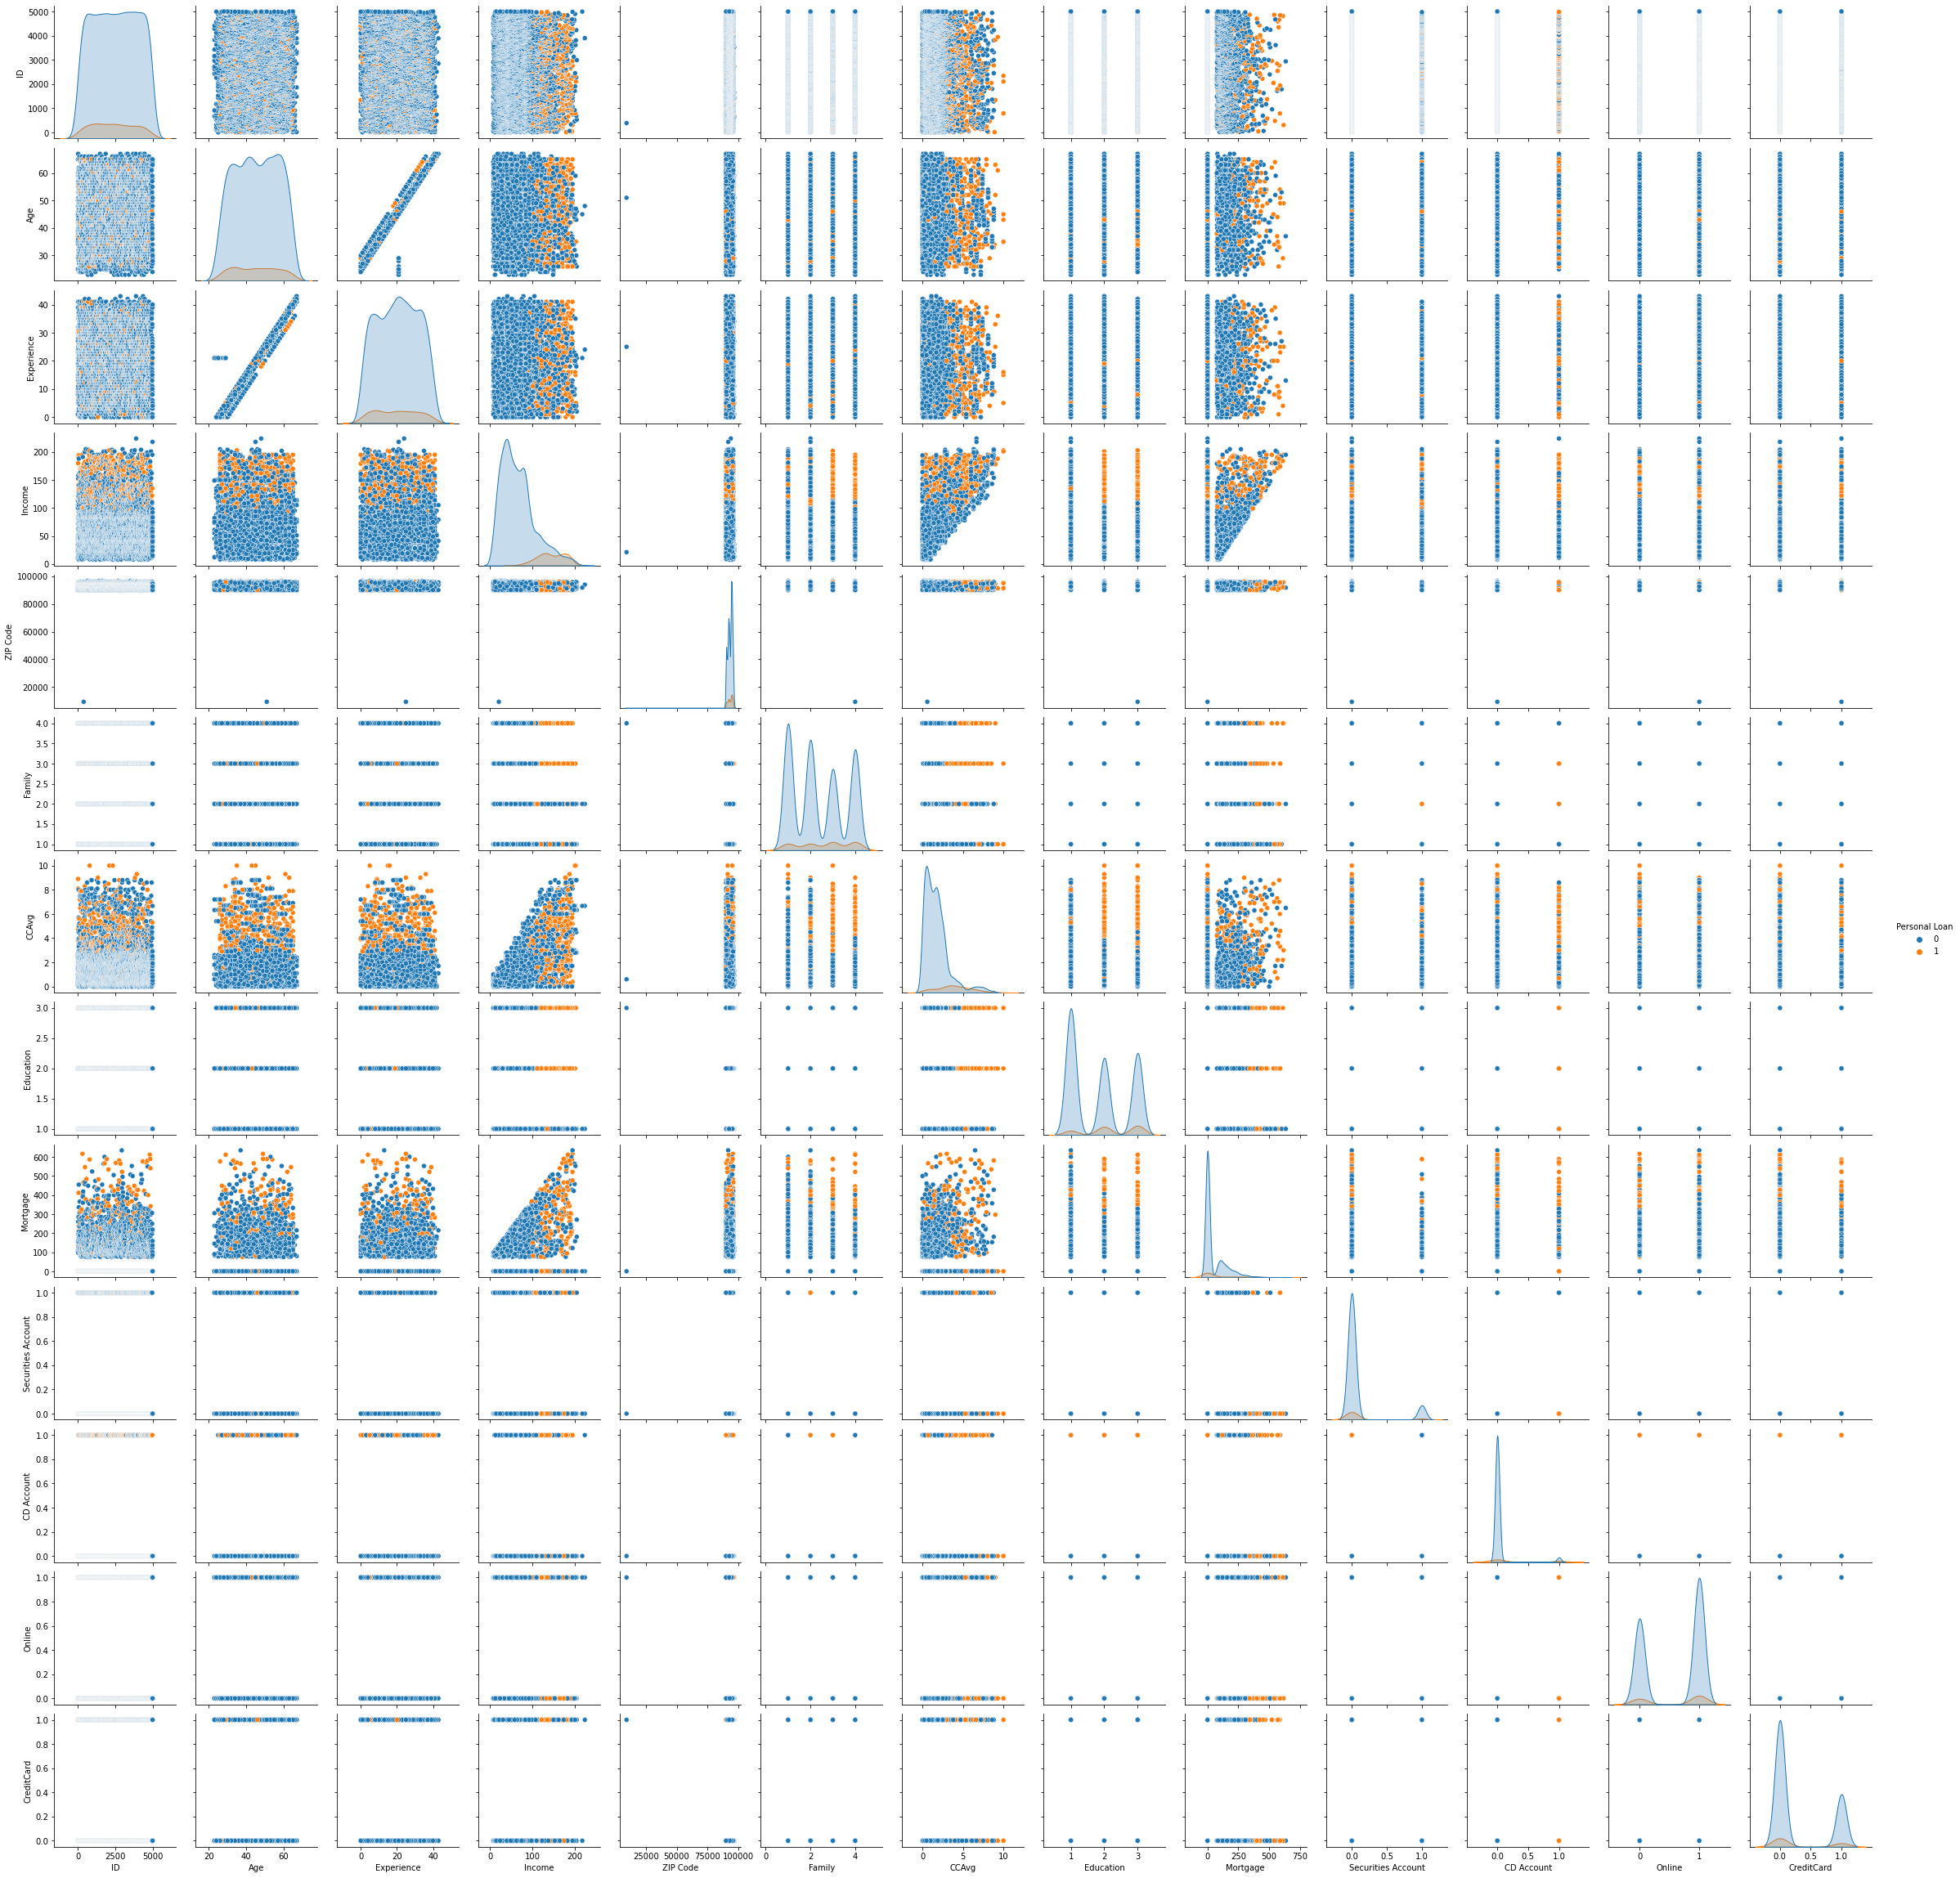

In [14]:
sns.pairplot(data = bankdf, hue = 'Personal Loan', diag_kind = 'kde')

<AxesSubplot:xlabel='Education', ylabel='Income'>

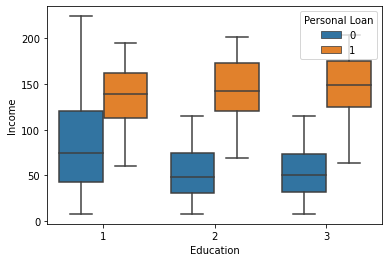

In [33]:

sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = bankdf)
#Customers with undergraduate level of education and family greater than 3 are good customers who took loan
#Customer who took loan have same income range irrespective of education level


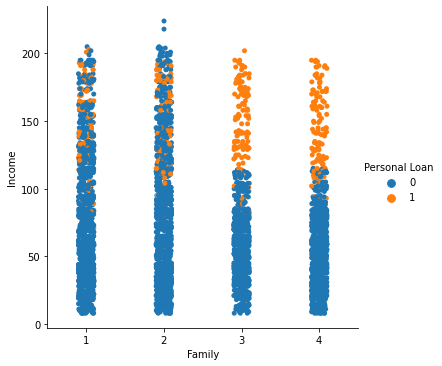

In [32]:
#Family and Education has low association with Personal Loan so using them to see the plot
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = bankdf)


#Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

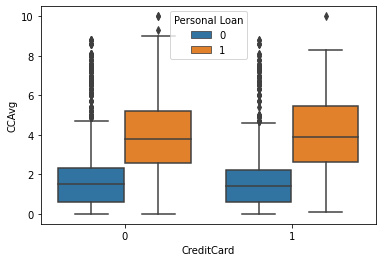

In [38]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=bankdf)
#Customers who have credit card and monthly spending is higher are more likly to take loan.

<AxesSubplot:>

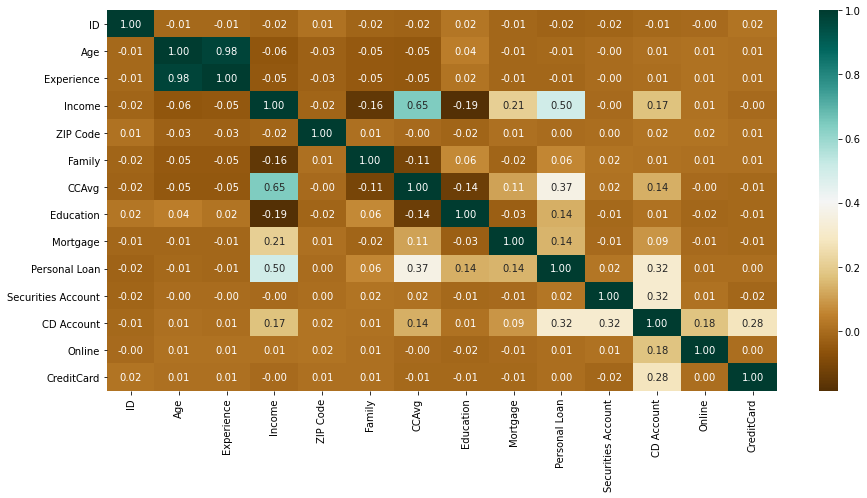

In [52]:
plt.figure(figsize = (15,7))
sns.heatmap(bankdf.corr(), cmap='BrBG',annot=True, fmt='.2f')

# Age and Experience are highly correlated with coefficient of 0.98
#Personal Loan has maximum correlation with Income(0.5),CCAvg(0.37),CD Account(0.32), Mortgage(0.14), and Education(0.14).
#Mortgage has moderate correlation with Income of 0.21.
#Income and CCAvg are moderately correlated



In [92]:
#Question 4

from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
encoded_array = OHE.fit_transform(bankdf[['Education']]).toarray()
encoded_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [93]:
bankdf[['Education_1', 'Education_2', 'Education_3']] = encoded_array
bankdf.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0,1.0,0.0,0.0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0,1.0,0.0,0.0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1,0.0,1.0,0.0


In [94]:
bankdf.shape

#Dropping the Education variable

bankdf.drop('Education', axis = 1, inplace = True)
bankdf.shape

(5000, 16)

In [95]:
#Question 5


#Separate the data into dependent and independent variables 

y = bankdf['Personal Loan']
x = bankdf.drop('Personal Loan', axis = 1)

In [96]:
#Creating training and test sets out of them (X_train, y_train, X_test, y_test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [97]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 15), (1500, 15), (3500,), (1500,))

In [98]:
#Question 6
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#to transform the training and test data into scaled values 

In [99]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#we use fit_transform() on training data but transform() on the test data
#Here with fit_transform the model built by us will learn the mean and variance of the features of the training set.
#These learned parameters are then used to scale our test data.
#Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data

In [100]:
#question 7


def func(model, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("\nResults on the test set")
    print("\nConfusion Matrix\n")
    print(confusion_matrix(y_test, y_pred))
    print()
    print(f"Accuracy score on the test set:\t{accuracy_score(y_test, y_pred)}")
    print(f"Recall score on the test set:\t{recall_score(y_test, y_pred)}")
    print(f"Precision score on the test set:\t{precision_score(y_test, y_pred)}")
    print(f"Specificity score on the test set:\t{recall_score(y_test, y_pred, pos_label = 0)}")
    print(f"f1_score on the test set:\t{f1_score(y_test, y_pred)}")



In [101]:
#Question 8

#Logistic Regression

log_reg = LogisticRegression()
func(log_reg)


Results on the test set

Confusion Matrix

[[1352   11]
 [  44   93]]

Accuracy score on the test set:	0.9633333333333334
Recall score on the test set:	0.6788321167883211
Precision score on the test set:	0.8942307692307693
Specificity score on the test set:	0.991929567131328
f1_score on the test set:	0.7717842323651453


In [102]:
param_grid = [{'C':[0.01, 0.1, 1, 10, 100, 1000]}]
log_reg2 = LogisticRegression()
grid_search = GridSearchCV(log_reg2, param_grid, cv = 5,
                        scoring = 'f1',
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='f1')

In [103]:
grid_search.best_estimator_

LogisticRegression(C=10)

In [104]:
#training the model on the best C value
log_reg3 = LogisticRegression(C = 10)
func(log_reg3)


Results on the test set

Confusion Matrix

[[1351   12]
 [  44   93]]

Accuracy score on the test set:	0.9626666666666667
Recall score on the test set:	0.6788321167883211
Precision score on the test set:	0.8857142857142857
Specificity score on the test set:	0.9911958914159942
f1_score on the test set:	0.7685950413223139


In [105]:
#KNN

knn = KNeighborsClassifier()
func(knn)


Results on the test set

Confusion Matrix

[[1355    8]
 [  58   79]]

Accuracy score on the test set:	0.956
Recall score on the test set:	0.5766423357664233
Precision score on the test set:	0.9080459770114943
Specificity score on the test set:	0.9941305942773294
f1_score on the test set:	0.7053571428571428


In [109]:
param_grid2 = [{'n_neighbors':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}]
knn2 = KNeighborsClassifier()
grid_search2 = GridSearchCV(knn2, param_grid2,
                        scoring = 'f1',
                          return_train_score=True)
grid_search2.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}],
             return_train_score=True, scoring='f1')

In [112]:
grid_search2.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [113]:
#training the model on the best n_neighbors value
knn3 = KNeighborsClassifier(n_neighbors = 12)
func(knn3)


Results on the test set

Confusion Matrix

[[1359    4]
 [  67   70]]

Accuracy score on the test set:	0.9526666666666667
Recall score on the test set:	0.5109489051094891
Precision score on the test set:	0.9459459459459459
Specificity score on the test set:	0.9970652971386648
f1_score on the test set:	0.6635071090047393


In [114]:
#Naive Bayes

gnb1 = GaussianNB()
func(gnb1)


Results on the test set

Confusion Matrix

[[1278   85]
 [  51   86]]

Accuracy score on the test set:	0.9093333333333333
Recall score on the test set:	0.6277372262773723
Precision score on the test set:	0.5029239766081871
Specificity score on the test set:	0.9376375641966251
f1_score on the test set:	0.5584415584415584


In [115]:
#Question 9

models = [log_reg3, knn3, gnb1]
pd.DataFrame(index = [type(x).__name__ for x in models],
            data = {'Accuracy':[accuracy_score(y_test, x.predict(x_test)) for x in models],
                   'Recall':[recall_score(y_test, x.predict(x_test)) for x in models],
                   'Precision':[precision_score(y_test, x.predict(x_test)) for x in models],
                   'Specificity':[recall_score(y_test, x.predict(x_test), pos_label=0) for x in models],
                   'f1_score':[f1_score(y_test, x.predict(x_test)) for x in models]})

,Accuracy,Recall,Precision,Specificity,f1_score
LogisticRegression,0.962667,0.678832,0.885714,0.991196,0.768595
KNeighborsClassifier,0.952667,0.510949,0.945946,0.997065,0.663507
GaussianNB,0.909333,0.627737,0.502924,0.937638,0.558442


In [ ]:
#KNN model performs the best, evident from above results. However accuracy is better for Logistic Regression.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 94% (Precision) which is better than the rest
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 51% still we end up offering more loans at end of program
#Sensitivity=TP/(FN+TP) here TP=70 FN=67